# JUMPlus Python Project 3

## Linear Regression with the Iris Dataset

### by Nicholas Crossman

This time, we've been given the `Iris` dataset, which contains a lot of data on iris flowers. 
We'll use it to practice using linear regression to get more information from a dataset.

First, we need to import a few libraries.

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sb
import sklearn

Next, we read in the dataset into a DataFrame.

In [3]:
data = pd.read_csv("Iris.csv")

As before, let's show the first 5 entries to see what we're dealing with.

In [4]:
data.head().style

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5,3.6,1.4,0.2,Iris-setosa


Let's make a few dataframes with different criteria.

First, we'll find all records with a `SepalWidthCm` greater than 4.

In [7]:
sepalwidth_greater_than_4 = data[data['SepalWidthCm'] > 4]
sepalwidth_greater_than_4.style

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


Next, let's look at records with a `PetalWidthCm` greater than 1.

In [4]:
petalwidth_greater_than_1 = data[data['PetalWidthCm'] > 1]
petalwidth_greater_than_1.style

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,51,7,3.2,4.7,1.4,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,Iris-versicolor
53,54,5.5,2.3,4,1.3,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
55,56,5.7,2.8,4.5,1.3,Iris-versicolor
56,57,6.3,3.3,4.7,1.6,Iris-versicolor
58,59,6.6,2.9,4.6,1.3,Iris-versicolor
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
61,62,5.9,3,4.2,1.5,Iris-versicolor


Let's change the constraint to `PetalWidthCm > 2`.

In [5]:
petalwidth_greater_than_2 = data[data['PetalWidthCm'] > 2]
petalwidth_greater_than_2.style

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6,2.5,Iris-virginica
102,103,7.1,3,5.9,2.1,Iris-virginica
104,105,6.5,3,5.8,2.2,Iris-virginica
105,106,7.6,3,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


I find it curious that the values in the width columns seem to cluster around a certain value.

Let's now look at the length values for petals and sepals, and use a scatter plot so we can better 
see the relationship between them.

### Scatter Plot Visualization

Seaborn provides a method to generate a scatter plot: `sb.scatterplot()`. 
However, to show both `SepalLengthCm` and `PetalLengthCm` on the same plot, we must first 
put them into the same DataFrame.

We will add the `Species` column to help us color the plot later.

In [12]:
length_comparison = pd.DataFrame(data=data, columns=['SepalLengthCm', 'PetalLengthCm', 'Species'])

Next we draw the scatter plot.

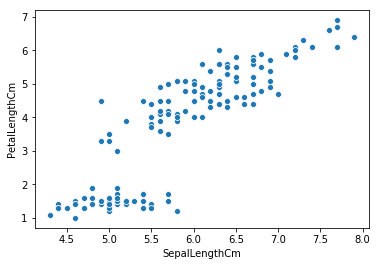

In [16]:
sb.scatterplot(data=length_comparison, x='SepalLengthCm', y='PetalLengthCm')

There seem to be two distinct groups. We can hypothesize that these represent different species, which may 
have different flower shapes leading to the grouping. 

Let's see if this is the case. Seaborn lets us set the `hue` value to color the dots based on another variable. In this case, we'll use `Species`. We'll set the palette to `husl`, provided in the Seaborn documentation, to make sure we can tell them apart.

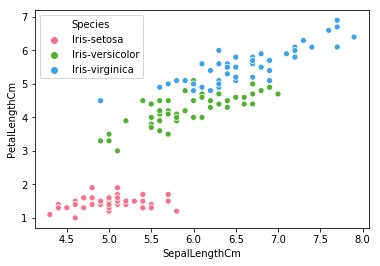

In [18]:
sb.scatterplot(data=length_comparison, x='SepalLengthCm', y='PetalLengthCm', hue='Species', palette='husl')

As we can see, the color reveals that one species is different from the other two, `Iris-setosa`, having unusually short sepals and little variation in petal length at all, forming a distinct grouping on the plot. 

With the other two, `Iris-versicolor` has shorter petal length than `Iris-virginica` for the same values of sepal length, but there may be some overlap between them. With these groups, petal length seems to increase as sepal length increases, in a linear relationship.

## Linear Regression

While visual comparisons are useful for an initial understanding of the data, we need some numbers if we're to use this 
data to make any predictions.

We will use the linear regression methods of `sklearn` to gain a better understanding of the data.

### Model 1 - Sepal Width vs Sepal Length

For this model `x` will be `SepalWidthCm`, and will serve as our independent variable. Our dependent variable will be `SepalLengthCm`, stored as `y`.

We will then split our data into training and testing values for both `x` and `y`, using the `train_test_split()` function.

In [31]:
from sklearn.model_selection import train_test_split

x = data['SepalWidthCm']
y = data['SepalLengthCm']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: SepalWidthCm, dtype: float64

Now let's check the values of each of these sets.

In [27]:
x_train.head()

63     2.9
7      3.4
124    3.3
142    2.7
4      3.6
Name: SepalWidthCm, dtype: float64

In [28]:
x_test.head()

62     2.2
111    2.7
20     3.4
45     3.0
86     3.1
Name: SepalWidthCm, dtype: float64

In [29]:
y_train.head()

63     6.1
7      5.0
124    6.7
142    5.8
4      5.0
Name: SepalLengthCm, dtype: float64

In [30]:
y_test.head()

62     6.0
111    6.4
20     5.4
45     4.8
86     6.7
Name: SepalLengthCm, dtype: float64